In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

## For understanding the dataset
## READ THE DATASET

In [13]:
df=pd.read_csv("C:\\Users\\OK\\Downloads\\olympics (2).csv")

## Print the shape of the dataset.

In [18]:
df.shape

(7356, 14)

## Describe the Age column of the dataset on various parameters using describe API.

In [19]:
df["Age"].describe()

count    6996.000000
mean       25.315323
std         6.070875
min        13.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        71.000000
Name: Age, dtype: float64

## Print the list of columns that have numeric datatypes.

## Numeric datatypes include ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'].

## Try to solve this problem with pandas and numpy.

In [20]:
numeric_cols = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
numeric_cols

['ID', 'Age', 'Year']

## Print the columns that contain null values along with the count of null values present in each column.

In [22]:
null_cols = df.columns[df.isnull().any()]
for col in null_cols:
    print(col, '-', df[col].isnull().sum())

Age - 360
City - 1
Sport - 1
Event - 1
Medal - 6483
region - 5


## You found out that Age, Height, Weight, Medal, region and notes columns contain null values.
## Now you need to handle these missing values.
## For the columns "Height, Weight and notes", you are going to drop these columns as they are not required in our further analysis.
## For the "region" column, remove all the rows where the region column is having null values.
## print the shape of the dataset after performing the missing value handling operations.

In [17]:
df.drop(columns=["Height","Weight","notes"],inplace=True)
re=df.dropna(subset=["region"])
df.shape

(7356, 14)

## Still there are missing values present in the "Medal" column. Now you don't need to drop the values present in this column because Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals.

## Let's replace these missing values with 'DNW'. DNW means Did not win.

## For the output print the unique number of values present in the Medal column.

In [25]:
df['Medal'] =df['Medal'].fillna('DNW')
print(df['Medal'].value_counts())

Medal
DNW       6483
Bronze     308
Gold       298
Silver     267
Name: count, dtype: int64


## You have an Age column that contains some null values. Rather than deleting them, fill these missing values by (means of the age of the players belonging to that particular game
## Let's suppose there is a missing value of Age where the sport is Swimming, then replace that missing value of age with the mean age of all the players who belong to Swimming. Similarly for all other sports.

## After this print the mean of the Age column.

In [26]:
mean_age = round(df.groupby('Sport')['Age'].mean())
age_loc = df.loc[df.Age.isnull()].index
for i in age_loc:
  df.loc[i, "Age"] = mean_age[df.loc[i, "Sport"]]
print(round(df.Age.mean()))

25


## Is the overall distribution of Gold Medals tally of India, left or negatively skewed?


In [35]:
india_gold = df[(df['region'] == 'India') & (df['Medal'] == "Gold")]
values = india_gold.groupby('Year')['Medal'].value_counts()
if skew(values) >0:
    print('Right Skewed')
else:
    print('Left Skewed')


Right Skewed


## Calculate the probability distribution of the Age column for swimming in the Sport column.

## Firstly plot the line chart to get the idea of the range of probability distribution and then print the maximum probability distribution in the range of 5.

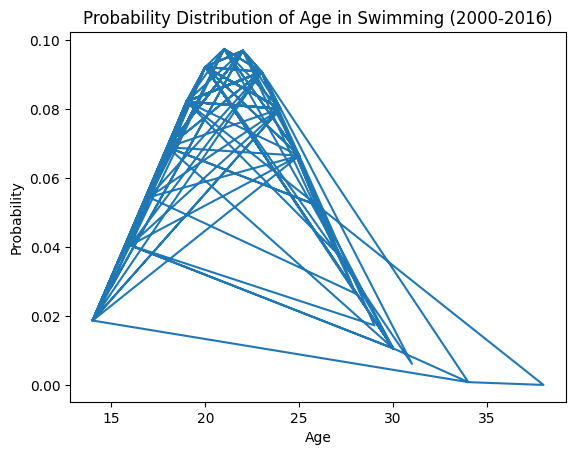

20 to 25


In [37]:
from scipy.stats import norm
swimming_age = df.loc[(df["Sport"] == "Swimming") & (df["Year"] >= 2000) & (df["Year"] <= 2016)]["Age"]
mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)
probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)
plt.plot(swimming_age, probability_pdf)
plt.title('Probability Distribution of Age in Swimming (2000-2016)')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()
print("20 to 25")

## What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)

## Output Format

## Standard Deviation when hosting
## Standard Deviation when not hosting

In [40]:
import statistics
req1 = df.loc[(df['City'] == 'London') & (df['region'] == 'UK') & (df['Medal'] == 'Gold')]
year_count1 = req1['Year'].value_counts()
std_host = statistics.stdev(year_count1)

req2 = df.loc[(df['City'] != 'London') & (df['region'] == 'UK') & (df['Medal'] == 'Gold')]
year_count2 = req2['Year'].value_counts()

std_not_host = statistics.stdev(year_count2)

print(std_host)
print(std_not_host)

0.0
0.7071067811865476


## Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

## Output Format

## standardized mean
## standardized standard deviation

In [41]:
shooting_data = df[df['Sport'] == 'Shooting']

# Calculate the mean and standard deviation of the age column in the Shooting Competition
age_mean = shooting_data['Age'].mean()
age_std = shooting_data['Age'].std()

# Standardize the age data
shooting_data['Standardized_Age'] = (shooting_data['Age'] - age_mean) / age_std

# Calculate the mean and standard deviation of the standardized age data
standardized_age_mean = shooting_data['Standardized_Age'].mean()
standardized_age_std = shooting_data['Standardized_Age'].std()

print(round(standardized_age_mean))
print(round(standardized_age_std))


0
1


C:\Users\OK\AppData\Local\Temp\ipykernel_5736\4211069278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_data['Standardized_Age'] = (shooting_data['Age'] - age_mean) / age_std


## Is Age positively correlated or negatively correlated with winning the medal?

## Print "Positive" if the correlation is positive and "Negative" if the correlation is negative.

## Output format

## Print "Positive" or "Negative"

In [42]:
labels,categories = pd.factorize(df["Medal"]) 
df["medal_labels"] = labels 
if (df["Age"].corr(df["medal_labels"]) > 0):
    print('Positive')
else:
    print('Negative') 


Positive


## From the dataset, Calculate the IQR for the Age column.

## Output Format

## IQR value

In [43]:
q1=df["Age"].quantile(.25)
q2 =df["Age"].quantile(.75)
print(q2-q1)

7.0


## In how many cities Olympics been held so far?

## Also create a bar graph of the number of times cities hosted the Olympics.

## Output Format

## Number of cities

In [44]:
count = 0
for i in df.City.unique():
    count += 1
print(count)

43


## Which sport is having the most number of medals so far?

## First plot the bar chart to find out the top 5 sports that have the most number of medals and then print the sport having the highest medals.

## Output Format
## Sport having most medals

Sport       Medal
Athletics   DNW      1363
Swimming    DNW       508
Gymnastics  DNW       442
Shooting    DNW       370
Football    DNW       295
Name: count, dtype: int64


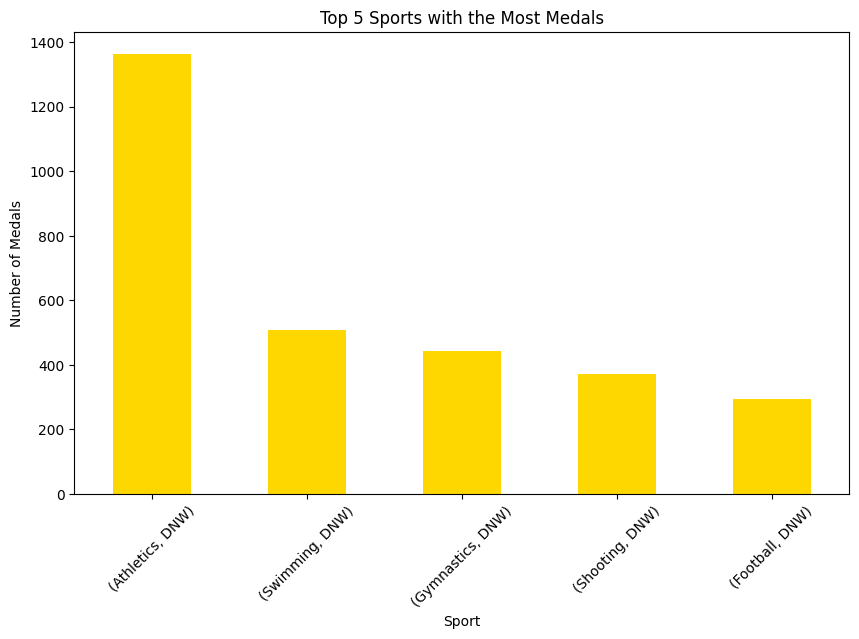

('Athletics', 'DNW')


In [45]:
medal_counts = df.groupby('Sport')['Medal'].value_counts().sort_values(ascending=False)

top_5_sports = medal_counts.head(5)
print(top_5_sports)

plt.figure(figsize=(10, 6))
top_5_sports.plot(kind='bar', color='gold')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Top 5 Sports with the Most Medals')
plt.xticks(rotation=45)
plt.show()

sport_with_most_medals = medal_counts.idxmax()
print(sport_with_most_medals)

## Which Sport has the most number of Gold Medals so far?

## First plot the bar chart to find out the top 5 sports that have the most number Gold of medals and then print the sport having the highest number of Gold medals.

## Output Format

## Sports having the most number of gold medals

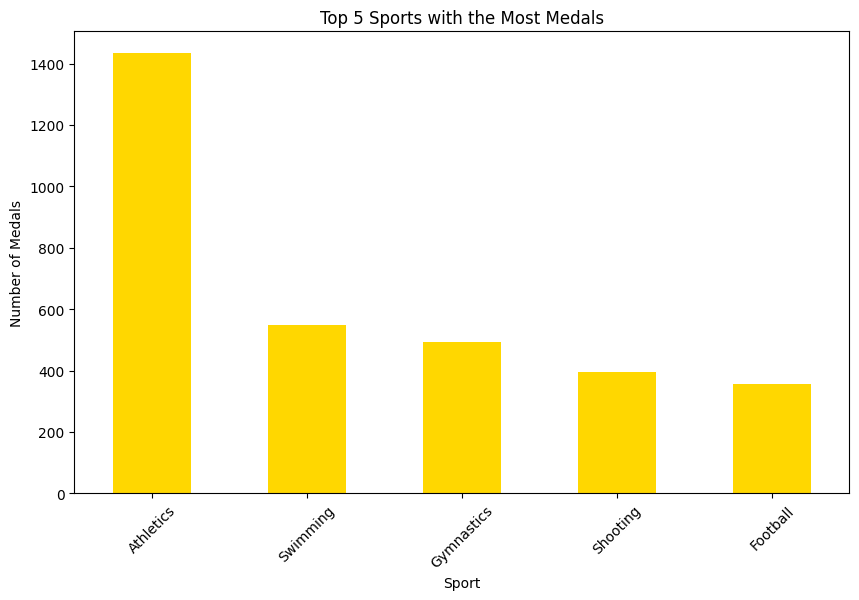

Athletics


In [46]:
medal_counts = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)

top_5_sports = medal_counts.head(5)

plt.figure(figsize=(10, 6))
top_5_sports.plot(kind='bar', color='gold')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Top 5 Sports with the Most Medals')
plt.xticks(rotation=45)
plt.show()

sport_with_most_medals = medal_counts.idxmax()
print(sport_with_most_medals)

## In which year did India win the first Gold Medal in the Olympics?

## Output Format

## Print Year 

In [48]:
india_gold_medals = df[(df['region'] == 'India') & (df['Medal'] == 'Gold')]

# Find the earliest year in which India won a Gold Medal
earliest_year = india_gold_medals['Year'].min()

# Print the year
print(earliest_year)



1928


## Which event is most popular in terms of the number of players?

## First plot the bar chart to find out the top 5 sports that have the most number of participants and then print the sport having the highest number of players participating.

## Output Format

## Sport in which most players participate.

In [49]:
athletes_by_event = df.groupby('Event')['Name'].nunique()
sorted_events = athletes_by_event.sort_values(ascending=False)
print(sorted_events.index[0])



Football Men's Football


## Which sport is having the most female Gold Medalists?

## First plot the bar chart to find out the top 5 sports that have the most female Gold Medalists and then print the sport having the most female Gold Medalists.

## Output Format

## Sports having the most female Gold Medalists

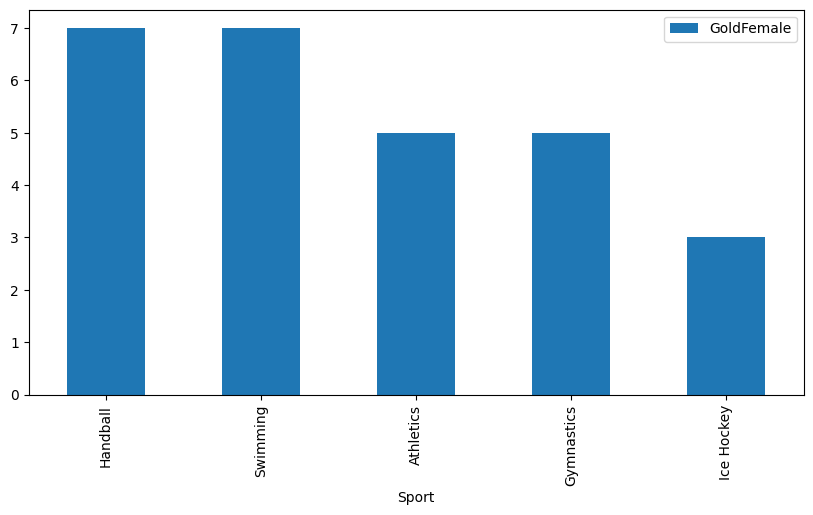

Swimming


In [50]:
gold = df[df['Medal'] == 'Gold'] 
gold_female = gold[gold['Sex'] == 'F'] 
data = [] 
for sport in gold_female['Sport'].unique():
    data.append([sport, len(gold_female[gold_female['Sport']== sport])]) 
data = pd.DataFrame(data, columns=['Sport', 'GoldFemale']).sort_values(by = 'GoldFemale', ascending = False).head() 
data.plot(x='Sport', y='GoldFemale', kind='bar', figsize=(10,5)) 
plt.show() 
print("Swimming")



## CONCLUSION

## Athletics is the sport having the most number of gold medals and  In 1928 India win the first Gold Medal in the Olympics                           
                                                                                 

## Football Men's Football event is most popular in terms of the number of players

## swimming sport is having the most female Gold Medalists
                                                                                                                                            